Hypothesis: Weather conditions affect to Nordpool Spot electric prices in Finland?
Use electric prices data given or you can use other sources to get Nordpool Spot in Finland.
For weather data you can use given dataset or seek weather data from other sources such as NCEI https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation or from Finnish Meterological Institute https://www.ilmatieteenlaitos.fi/havaintojen-lataus.
 Tips:
- Bounding box (geographic data) need to be selected for the area where weather conditions affect Spot-prices in Finland (Weather in Finland vs in Scandinavia, for example)
- Spot-prices are estimated one day before, need to shift data?
- Weather conditions which might affect to prices such as, temperature, wind speed, amount of rain.
- Some global events and other energy sources affect to prices. Data for these are not needed but you can discuss these also how these might affect.

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import Data_Eng_Functions as ff
import matplotlib.dates as mdates

In [2]:
#Parse HTML-files form the directory to get electricity prices into a Dataframe
data_folder = r"/Electric_prices_data"
df = ff.parseHTMLfiles(data_folder)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 18552 to 11880
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23040 non-null  datetime64[ns]
 1   Price   23040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 540.0 KB


In [3]:
#view electricity dataframe
df.head()
# we could see price is recorded in every hour of the day from 6 march 2020

,Date,Price
18552,2020-03-06 00:00:00,1.70624
18553,2020-03-06 01:00:00,1.91456
18554,2020-03-06 02:00:00,1.85504
18555,2020-03-06 03:00:00,1.85876
18556,2020-03-06 04:00:00,1.89472


In [4]:
#save the the dataframe to CSV file for later use.
df.to_csv('Electric_prices_data.csv')

In [5]:
#volatility is often measured as standard deviation and more volatility usually means less predictable behaviour(prices)
# lets find the volatility of the electricity price in a day
daily_volatility = df.groupby(pd.Grouper(key='Date', freq='D')).transform('std')
df['daily_volatility'] = daily_volatility

In [6]:
#view updated electricity dataframe
df.head()

,Date,Price,daily_volatility
18552,2020-03-06 00:00:00,1.70624,1.50883
18553,2020-03-06 01:00:00,1.91456,1.50883
18554,2020-03-06 02:00:00,1.85504,1.50883
18555,2020-03-06 03:00:00,1.85876,1.50883
18556,2020-03-06 04:00:00,1.89472,1.50883


In [7]:
#lets load the weather data from "fmi_weather_grouped" csv file located in the workspace
weather = pd.read_csv("fmi_weather_grouped.csv", parse_dates=['Time'])

In [8]:
#view electricity dataframe
weather.head()
# we could see weather data is also recorded in every hour of the day from 1st march 2020
# and there are temperatuer and wind record availabel.

,Time,Temp,Wind
0,2020-03-01 00:00:00,-7.462687,2.984756
1,2020-03-01 01:00:00,-7.335323,2.999390
2,2020-03-01 02:00:00,-7.111940,3.107317
3,2020-03-01 03:00:00,-6.934000,3.317178
4,2020-03-01 04:00:00,-6.928856,3.449390


In [9]:
df['Price'].count() #electricity price has 23040 values
weather['Temp'].count() # temperature has 23521 values

23521

In [10]:
#As datasets are of different length (in time) lets combine them into a single data frame by Date value
combine_data_frame = pd.merge(df, weather, how='inner',left_on='Date', right_on='Time') #23040

In [11]:
#lets drop values, if there any null values and Time column
combine_data_frame = combine_data_frame.dropna(how='any',axis=0)
combine_data_frame = combine_data_frame.drop('Time', axis=1)

In [12]:
combine_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23040 non-null  datetime64[ns]
 1   Price             23040 non-null  float64       
 2   daily_volatility  23040 non-null  float64       
 3   Temp              23040 non-null  float64       
 4   Wind              23040 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.1 MB


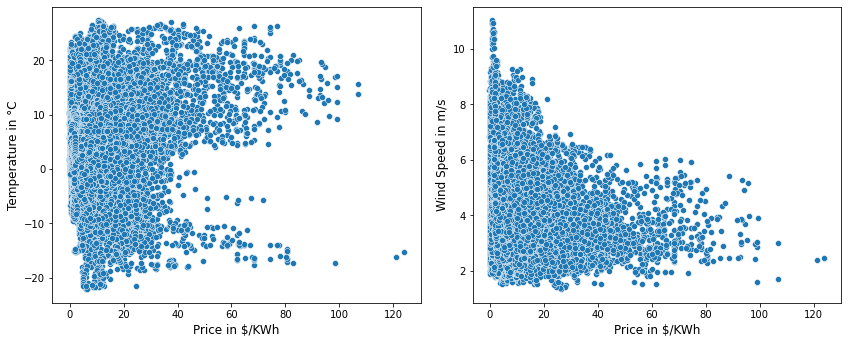

In [13]:
#Lets use scatter plot for visually checking the dependence between datasets
sns_fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12, 5))
# sns_fig, ax1 = plt.subplots(figsize=(4, 3))
# sns_fig, ax2 = plt.subplots(figsize=(4, 3))
sns.scatterplot(data = combine_data_frame, x = 'Price', y = 'Temp', ax=ax1)
ax1.set_xlabel( "Price in $/KWh" , size = 12 )
ax1.set_ylabel( "Temperature in °C" , size = 12 )
sns.scatterplot(data = combine_data_frame, x = 'Price', y = 'Wind', ax=ax2)
ax2.set_xlabel( "Price in $/KWh" , size = 12 )
ax2.set_ylabel( "Wind Speed in m/s" , size = 12 )
sns_fig.tight_layout(pad=1.5)
plt.show()
#Seems like there is no correlation between temperature & price and wind speed & Price

In [14]:
#Lets find is there correlation between temperature and prices
#pip install scipy for using person correaltion function
from scipy.stats.stats import pearsonr
pearsonr(combine_data_frame['Price'], combine_data_frame['Temp']) #(0.06290237406538501, 1.2138895220572913e-21)
# When the value lies below + .29, then it is said to be a small positive correlation.
# As the value is cost to zero we could say ther is no correlation between temperature and price. 
# A p-value less than 0.05 (typically ≤ 0.05) is statistically significant.
# So the P value indicates the result is signifgicant.


(0.06290237406538501, 1.2138895220572913e-21)

In [15]:
#Lets find is there correlation between wind and price
pearsonr(combine_data_frame['Price'], combine_data_frame['Wind']) #(-0.22088546970544862, 1.3805760190960267e-252)
# When the value lies below - .29, then it is said to be a small negative correlation.
# As the value -0.22, we could say there is small negative correaltion between windspeed and price.
# Also the two tale P value indicates the result is signifgicant.

(-0.22088546970544862, 1.3805760190960267e-252)

- Spot-prices are estimated one day before, need to shift data?
lets shift the data and see if there is any relation between the variables

In [16]:
#As there are different length of data readings in a day 
#we need to group data by date before shifting the price value to one day
combine_data_frame_daywise = combine_data_frame.groupby(pd.Grouper(key='Date', freq='D')).agg(
    {'Price': 'mean', 'daily_volatility' : 'mean', 'Temp' : 'mean', 'Wind' : 'mean'}).reset_index()

In [17]:
#Now lets shift the price and daily_volatility value by one day
combine_data_frame_daywise['Price'] = combine_data_frame['Price'].shift(1)
combine_data_frame_daywise['daily_volatility'] = combine_data_frame['daily_volatility'].shift(1)

In [18]:
#lets see the data frame
combine_data_frame_daywise.head()

,Date,Price,daily_volatility,Temp,Wind
0,2020-03-06,NaN,NaN,-1.735576,4.115074
1,2020-03-07,1.70624,1.50883,-1.952889,3.121068
2,2020-03-08,1.91456,1.50883,-0.563879,5.572391
3,2020-03-09,1.85504,1.50883,2.823647,6.732370
4,2020-03-10,1.85876,1.50883,1.565756,4.979806


In [19]:
# As now we have missing value in the dataframe lets delete those rows and view info
combine_data_frame_daywise = combine_data_frame_daywise.dropna(how='any',axis=0).reset_index()
combine_data_frame_daywise.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             959 non-null    int64         
 1   Date              959 non-null    datetime64[ns]
 2   Price             959 non-null    float64       
 3   daily_volatility  959 non-null    float64       
 4   Temp              959 non-null    float64       
 5   Wind              959 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 45.1 KB


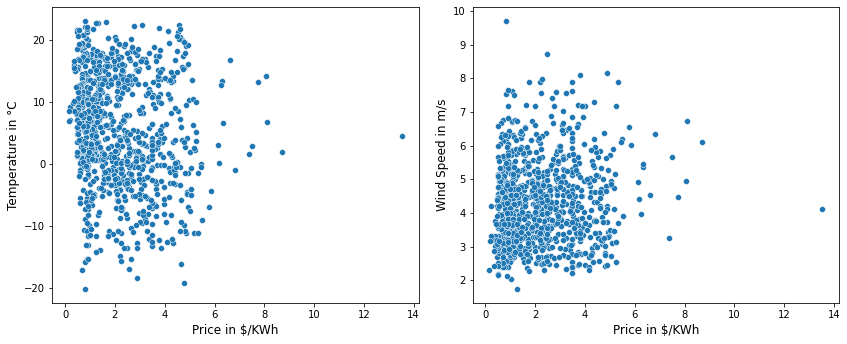

In [20]:
#Now again Lets use scatter plot for visually checking the dependence between datasets
sns_fig, [ax1, ax2] = plt.subplots(1,2,figsize=(12, 5))
sns.scatterplot(data = combine_data_frame_daywise, x = 'Price', y = 'Temp', ax=ax1)
ax1.set_xlabel( "Price in $/KWh" , size = 12 )
ax1.set_ylabel( "Temperature in °C" , size = 12 )
sns.scatterplot(data = combine_data_frame_daywise, x = 'Price', y = 'Wind', ax=ax2)
ax2.set_xlabel( "Price in $/KWh" , size = 12 )
ax2.set_ylabel( "Wind Speed in m/s" , size = 12 )
sns_fig.tight_layout(pad=1.5)
plt.show()
#Seems like the result is same as previous even after shifting the price value by one day

In [21]:
#Lets find is there correlation between temperature and prices
pearsonr(combine_data_frame_daywise['Price'], combine_data_frame_daywise['Temp'])
# After shifting price by one day we see the correlation has changed to negative.
# But the degree of correlation is very low and the significance is high.

(-0.1461950541018993, 5.470915806992982e-06)

In [22]:
#Is there correlation between prices and wind speeds
pearsonr(combine_data_frame_daywise['Price'], combine_data_frame_daywise['Wind'])
# After shifting price by one day we see the correlation has changed to positive.
# But the degree of correlation is very low and it is not statistically signifincant.

(0.12286480854528284, 0.00013654653573547462)

- Some global events and other energy sources affect to prices. Data for these are not needed but you can discuss these also how these might affect.

In [23]:
#Lets combine data day wise to have a better view of the plot
combine_data_frame_weekwise = combine_data_frame.groupby(pd.Grouper(key='Date', freq='D')).agg(
    {'Price': 'mean', 'daily_volatility' : 'mean', 'Temp' : 'mean', 'Wind' : 'mean'}).reset_index()

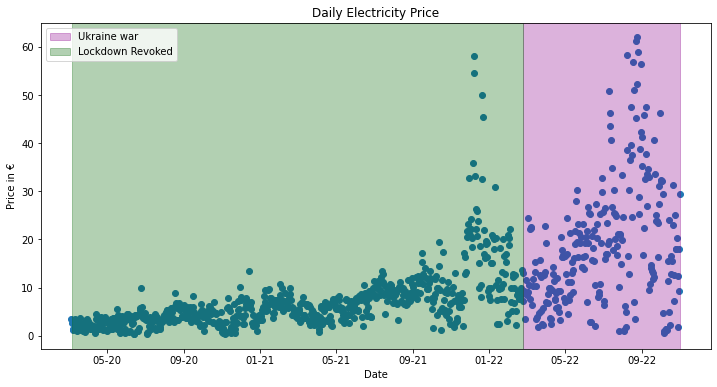

In [24]:
# Ukrain war might have impact on the price. It started on 24 February, 2022
# lets see what visualization tells
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))
# Add x-axis and y-axis
ax.scatter(combine_data_frame_weekwise['Date'],
       combine_data_frame_weekwise['Price'])
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price in €",
       title="Daily Electricity Price")
# mark the event in the plot
ax.axvspan("2022-02-24", max(combine_data_frame_weekwise['Date']), color="darkmagenta", label="Ukraine war", alpha=0.3)
ax.axvspan(min(combine_data_frame_daywise['Date']), "2022-02-24", color="darkgreen", label="Lockdown Revoked", alpha=0.3)

# Define the date format
date_form = mdates.DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.legend(loc="upper left")

plt.show()

# we could see that when countries were revoking covid lockdown, the energy price were trending up
# and after the russian invasion of ukraine the electricity price goes up drastically

weather stations locations in map 

In [25]:
# weather station location is stored in different database (weather_df.csv )
#lets import weather_df.csv

weather_station = pd.read_csv("weather_df.csv", parse_dates=['DATE'])
average = df['Price'].mean()
monthly = df.groupby(pd.Grouper(key='Date', freq='M')).transform('mean')
weekly = df.groupby(pd.Grouper(key='Date', freq='W')).transform('mean') 
#volatility is often measured as standard deviation and more volatility usually means less predictable behaviour(prices)
daily_volatility = df.groupby(pd.Grouper(key='Date', freq='D')).transform('std') 
df["daily_volatility"] = daily_volatility


In [26]:
weather_station.head()

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,WIND_DIR,WIND_SPEED
0,0,6300118,2020-03-06 00:00:00,59.6,5.7,NaN,NaN
1,1,9VDG7,2020-03-06 00:00:00,58.1,7.0,NaN,NaN
2,2,C6PZ7,2020-03-06 00:00:00,59.6,5.7,150.0,0.1
3,3,WDF9323,2020-03-06 00:00:00,57.3,8.6,120.0,3.6
4,4,6300118,2020-03-06 01:00:00,59.6,5.7,NaN,NaN


In [27]:
#Let's try plotting with JupyterDash

from dash import dcc, html
from jupyter_dash import JupyterDash
import plotly.express as px

In [28]:
#Let's try plotting with JupyterDash

from dash import dcc, html
from jupyter_dash import JupyterDash
import plotly.express as px

figures = []#list of figures to shown in dash

colors = px.colors.qualitative.T10
#plot location points of weather stations into map 
figmap = px.scatter_mapbox(weather_station, lat="LATITUDE", lon="LONGITUDE",  hover_data=["WIND_SPEED"],
                                            hover_name="STATION",
                                            color_discrete_sequence=["blue"], zoom=3)
figmap.update_layout(mapbox_style="open-street-map")
figmap.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig = px.scatter(df, x='Date', y='Price', # lineplot of electric prices
                        title="NordPoolSpot Prices $/KWh", hover_data=['Price', 'Date'],
                        hover_name="Price", #height=325, 
                        trendline='lowess', 
                        color_discrete_sequence = colors, trendline_options=dict(frac=0.01))#color_discrete_map={ "Price": "blue"},
#f = fig.full_figure_for_development(warn=False)
fig.update_traces(mode = 'lines')
fig.data[-1].line.color = 'red'


#fig.add_traces(go.Scatter(df, x="Date", y="Price"))#, trendline='ols'))#Regression line

fig.update_traces(opacity=0.2)#set opacity for previous line
fig.data[-1].name = 'Spot' #add name for last added trace 
fig.data[-1].showlegend = True

#fig.add_hline(average, annotation_text="Avg:"+str(np.round(average, 2)), annotation_position='left')#add horizontal line showing average
#fig.add_scatter(x=df['Date'], y=monthly['Price'], line={'color': 'red'})#note, x-axis values from df

#fig.data[-1].name = 'Monthly'
#fig.data[-1].showlegend = True

#plot wind speeds into same figure as electric prices
fig.add_scatter(x=combine_data_frame['Date'], y=combine_data_frame['Wind'], line={'color': 'green'})

fig.data[-1].name = 'Wind speeds'
fig.data[-1].showlegend = True


#fig_stat = px.line(df, x="Date", y="daily_volatility")
#fig_stat.data[-1].name = 'Daily volatility or std'
#fig_stat.data[-1].showlegend = True

#combine figures
figures.append(dcc.Graph(figure=fig, id='Prices'))
figures.append(dcc.Graph(figure=figmap))
app = JupyterDash(__name__)

app.layout = html.Div(figures)

app.run_server(mode='jupyterlab', debug=False, use_reloader=False, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True, port = 8062) #server start running with selected port


 * Running on http://127.0.0.1:8062/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Dec/2022 14:40:56] "GET /_alive_cec98939-902c-4ed1-848f-b0b238ef6542 HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:18] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:21] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:21] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:21] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:21] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:25] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:27] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:30] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:33] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2022 14:41:36] "GET /_reload-h